In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_20newsgroups


In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [4]:
Documents = dataset.data
type(Documents)

list

In [10]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


def removeAll_except_alph(docDataFrame,column):
    return DocumentDF[column].str.replace("[^a-zA-Z#]", " ")

def removeShort_words(docDataFrame,length,column):
    docDataFrame[column] = docDataFrame[column].apply(lambda x: ' '.join([w for w in x.split() if len(w)>length]))
    
    
def toLowerCase(docDataFrame,column):
    docDataFrame[column] = docDataFrame[column].apply(lambda x : x.lower())

    
def removeStopWord(docDataFrame,column):
    tokenize_data = docDataFrame[column].apply(lambda x : x.split())
    withoutStopWord = []
    for item in tokenize_data :
        tempdata = []
        for word in item :
            if(word not in stopwords):
                tempdata.append(word)
        withoutStopWord.append(tempdata)
    final_data = []
    for item in withoutStopWord :
        t = []
        t = ' '.join(item)
        final_data.append(t)
    docDataFrame[column] = final_data
    

def preprocess_doc(docDataFrame,column):
    docDataFrame[column] = removeAll_except_alph(DocumentDF,column)
    removeShort_words(docDataFrame,3,column)
    toLowerCase(docDataFrame,column)
    removeStopWord(docDataFrame,column)
    return docDataFrame
    
DocumentDF = pd.DataFrame({'Documents':Documents})
process_documents = preprocess_doc(DocumentDF,'Documents')

    
    

In [16]:
#convert into document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english',max_features= 1000,max_df = 0.5,smooth_idf=True)
Xvector = tfidf_vector.fit_transform(process_documents['Documents'])

In [60]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=200, random_state=122)
svd_model.fit(Xvector)
svd_model.components_
feature_name = tfidf_vector.get_feature_names()


for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(feature_name, comp)   #map the value of feature_name and comp
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i+1)+": ",end='')
    for t in sorted_terms:
        print(t[0],end='')
        print(" ",end='')
    print('')

Topic 1: like know people think good time thanks 
Topic 2: thanks windows card drive mail file advance 
Topic 3: game team year games season players good 
Topic 4: drive scsi disk hard card drives problem 
Topic 5: windows file window files program using problem 
Topic 6: government chip mail space information encryption data 
Topic 7: like bike know chip sounds looks look 
Topic 8: card sale video offer monitor price jesus 
Topic 9: know card chip video government people clipper 
Topic 10: good know time bike jesus problem work 
Topic 11: think chip good thanks clipper need encryption 
Topic 12: thanks right problem good bike time window 
Topic 13: good people windows know file sale files 
Topic 14: space think know nasa problem year israel 
Topic 15: space good card people time nasa thanks 
Topic 16: people problem window time game want bike 
Topic 17: time bike right windows file need really 
Topic 18: time problem file think israel long mail 
Topic 19: file need card files problem 

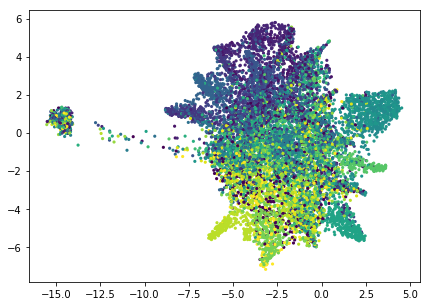

In [61]:
import umap  #use for visualization for higher dimension vectors

X_topics = svd_model.fit_transform(Xvector)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0],embedding[:, 1],c = dataset.target,s = 10,edgecolor='none')
plt.show()